In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/test/ModerateDemented/30.jpg
/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/test/ModerateDemented/29.jpg
/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/test/ModerateDemented/28.jpg
/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/test/ModerateDemented/32 (2).jpg
/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/test/ModerateDemented/27 (2).jpg
/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/test/ModerateDemented/31.jpg
/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/test/ModerateDemented/32.jpg
/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/test/ModerateDemented/30 (2).jpg
/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/test/ModerateDemented/29 (2).jpg
/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/test/Moderate

In [4]:
import tensorflow as tf
import os
import numpy as np
from tqdm import tqdm
from skimage.io import imread,imshow
import matplotlib.pyplot as plt
import random
from skimage.transform import resize

In [5]:
IMG_WIDTH =128
IMG_HEIGHT =128
IMG_CHANNELS = 3



In [7]:
seed =42
np.random.seed =seed


In [8]:
TRAIN_PATH = "/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/train"
TEST_PATH = "/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/test"

In [9]:
# train_ids = next(os.walk(TRAIN_PATH))[1]
# test_ids = next(os.walk(TEST_PATH))[1]

In [13]:
# X_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
# Y_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, 1), dtype = bool)

In [ ]:
# #Resizing the Image

# print("Resizing training images and masks")

# for n,id_ in tqdm(enumerate(train_ids),total=len(train_ids)):
#     path = TRAIN_PATH + id_
#     img = imread(path + '/images/' + id_ +'jpg')[:,:,:IMG_CHANNELS]
#     img = resize(img,(IMG_HEIGHT,IMG_WIDTH),mode='constant',preserve_range = True)
#     X_train[n] = img
#     mask = np.zeros((IMG_HEIGHT,IMG_WIDTH,1),dtype = np.bool)
#     for mask_file in next(os.walk(path +'/mask/'))[2]:
#         mask = imread(path + '/masks/' + mask_file)
#         mask_ = np.expand_dims(resize(mask_,(IMG_HEIGHT,IMG_WIDTH),mode='constant',preserve_range =True),axis=-1)
        
#         mask = np.maximum(mask,mask_)
        
#     Y_train[n] = mask

In [19]:
# Get list of class subdirectories
classes = ['ModerateDemented', 'MildDemented', 'NonDemented', 'VeryMildDemented']
train_ids = []

for cls in classes:
    class_dir = os.path.join(TRAIN_PATH, cls)
    for filename in os.listdir(class_dir):
        if filename.endswith('.jpg'):
            train_ids.append(os.path.join(class_dir, filename))
            
            
X_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
Y_train = np.zeros((len(train_ids),), dtype=np.uint8)

# Process images
print("Resizing training images")

Resizing training images


In [23]:
for n, img_path in tqdm(enumerate(train_ids), total=len(train_ids)):
    # Read the image
#     img = imread(img_path)[:, :, :IMG_CHANNELS]
    img = imread(img_path)
    
    # Check if image is grayscale (2D) and convert to RGB (3D)
    if img.ndim == 2:
        img = np.stack((img,)*3, axis=-1)  # Convert grayscale to RGB by duplicating the channels
    elif img.shape[2] == 4:
        img = img[:, :, :3] 
    
    
    # Resize the image
    img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    
    # Store the resized image in the X_train array
    X_train[n] = img
    
    # Extract the class from the path and convert to an integer label
    class_name = os.path.basename(os.path.dirname(img_path))
    label = classes.index(class_name)
    
    # Store the label in the Y_train array
    Y_train[n] = label

# Example output to ensure the arrays are created
print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)
print("Sample image shape:", X_train[0].shape)
print("Sample label:", Y_train[0])

100%|██████████| 5121/5121 [00:58<00:00, 87.55it/s]

X_train shape: (5121, 128, 128, 3)
Y_train shape: (5121,)
Sample image shape: (128, 128, 3)
Sample label: 0


In [ ]:
X_test = np.zeros((len(test_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
sizes_test = []
print('Resizing test images') 
for n, id_ in tqdm(enumerate(test_ids), total=len(test_ids)):
    path = TEST_PATH + id_
    img = imread(path + '/images/' + id_ + '.png')[:,:,:IMG_CHANNELS]
    sizes_test.append([img.shape[0], img.shape[1]])
    img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    X_test[n] = img

print('Done!')

In [28]:
#testing the image 
classes = ['ModerateDemented', 'MildDemented', 'NonDemented', 'VeryMildDemented']
test_ids = []
for cls in classes:
    class_dir = os.path.join(TRAIN_PATH, cls)
    for filename in os.listdir(class_dir):
        if filename.endswith('.jpg'):
            test_ids.append(os.path.join(class_dir, filename))
            
X_test = np.zeros((len(test_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
sizes_test = []
print('Resizing test images') 

# for n, img_path in tqdm(enumerate(train_ids), total=len(train_ids)):
#     # Read the image
# #     img = imread(img_path)[:, :, :IMG_CHANNELS]
#     img = imread(img_path)
    
#     # Check if image is grayscale (2D) and convert to RGB (3D)
#     if img.ndim == 2:
#         img = np.stack((img,)*3, axis=-1)  # Convert grayscale to RGB by duplicating the channels
#     elif img.shape[2] == 4:
#         img = img[:, :, :3] 
    
    
#     # Resize the image
#     img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    
#     # Store the resized image in the X_train array
#     X_test[n] = img
    
#     # Extract the class from the path and convert to an integer label
#     class_name = os.path.basename(os.path.dirname(img_path))
#     label = classes.index(class_name)
    
# print('done')


# Example output to ensure the arrays are created
# print("X_train shape:", X_train.shape)
# print("Y_train shape:", Y_train.shape)
# print("Sample image shape:", X_train[0].shape)
# print("Sample label:", Y_train[0])

Resizing test images


In [29]:
for n, img_path in tqdm(enumerate(test_ids), total=len(test_ids)):
    # Read the image
#     img = imread(img_path)[:, :, :IMG_CHANNELS]
    img = imread(img_path)
    
    # Check if image is grayscale (2D) and convert to RGB (3D)
    if img.ndim == 2:
        img = np.stack((img,)*3, axis=-1)  # Convert grayscale to RGB by duplicating the channels
    elif img.shape[2] == 4:
        img = img[:, :, :3] 
    
    
    # Resize the image
    img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    
    # Store the resized image in the X_train array
    X_test[n] = img
    
    # Extract the class from the path and convert to an integer label
    class_name = os.path.basename(os.path.dirname(img_path))
    label = classes.index(class_name)
    
    # Store the label in the Y_train array
#     Y_train[n] = label

100%|██████████| 5121/5121 [00:41<00:00, 122.08it/s]


In [31]:
# image_x = random.randint(0, len(train_ids))
# imshow(X_train[image_x])
# plt.show()
# imshow(np.squeeze(Y_train[image_x]))
# plt.show()

In [32]:
inputs = tf.keras.layers.Input((IMG_HEIGHT,IMG_WIDTH,IMG_CHANNELS))
s = tf.keras.layers.Lambda(lambda x : x/ 255)(inputs)

In [33]:
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', 
kernel_initializer='he_normal', padding='same')(s)
c1 = tf.keras.layers.Dropout(0.1)(c1)
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu',
 kernel_initializer='he_normal', padding='same')(c1)
p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

In [34]:
c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', 
kernel_initializer='he_normal', padding='same')(p1)
c2 = tf.keras.layers.Dropout(0.1)(c2)
c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', 
kernel_initializer='he_normal', padding='same')(c2)
p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)
 

In [35]:
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', 
kernel_initializer='he_normal', padding='same')(p2)
c3 = tf.keras.layers.Dropout(0.2)(c3)
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu',
kernel_initializer='he_normal', padding='same')(c3)
p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)


In [36]:
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', 
kernel_initializer='he_normal', padding='same')(p3)
c4 = tf.keras.layers.Dropout(0.2)(c4)
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', 
kernel_initializer='he_normal', padding='same')(c4)
p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)

In [37]:
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', 
kernel_initializer='he_normal', padding='same')(p4)
c5 = tf.keras.layers.Dropout(0.3)(c5)
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', 
kernel_initializer='he_normal', padding='same')(c5)

In [38]:
#Expansion Paths


In [39]:
u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
u6 = tf.keras.layers.concatenate([u6, c4])
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', 
padding='same')(u6)
c6 = tf.keras.layers.Dropout(0.2)(c6)
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', 
padding='same')(c6)

In [40]:
u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
u7 = tf.keras.layers.concatenate([u7, c3])
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', 
padding='same')(u7)
c7 = tf.keras.layers.Dropout(0.2)(c7)
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', 
padding='same')(c7)
 

In [41]:
u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
u8 = tf.keras.layers.concatenate([u8, c2])
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', 
padding='same')(u8)
c8 = tf.keras.layers.Dropout(0.1)(c8)
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', 
padding='same')(c8)

In [42]:
u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', 
padding='same')(u9)
c9 = tf.keras.layers.Dropout(0.1)(c9)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', 
padding='same')(c9)

In [43]:
outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)

In [44]:
#Summary of the Model
model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda (Lambda)     │ (None, 128, 128,  │          0 │ input_layer[0][0] │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 128, 128,  │        448 │ lambda[0][0]      │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 128, 128,  │          0 │ conv2d[0][0]      │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 128, 128,  │      2,320 │ dropout[0][0]     │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 64, 64,    │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 64, 64,    │      4,640 │ max_pooling2d[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 64, 64,    │          0 │ conv2d_2[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 64, 64,    │      9,248 │ dropout_1[0][0]   │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 32, 32,    │          0 │ conv2d_3[0][0]    │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 32, 32,    │     18,496 │ max_pooling2d_1[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 32, 32,    │          0 │ conv2d_4[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 32, 32,    │     36,928 │ dropout_2[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 16, 16,    │          0 │ conv2d_5[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 16, 16,    │     73,856 │ max_pooling2d_2[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 16, 16,    │          0 │ conv2d_6[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 16, 16,    │    147,584 │ dropout_3[0][0] 

 Total params: 1,941,105 (7.40 MB)

 Trainable params: 1,941,105 (7.40 MB)

 Non-trainable params: 0 (0.00 B)

In [46]:
# checkpointer = tf.keras.callbacks.ModelCheckpoint('model_for_nuclei.h5', 
# verbose=1, save_best_only=True)

# callbacks = [
#         tf.keras.callbacks.EarlyStopping(patience=2, monitor='val_loss'),
#         tf.keras.callbacks.TensorBoard(log_dir='logs')]

# results = model.fit(X_train, Y_train, validation_split=0.1, batch_size=16, epochs=25, 
# callbacks=callbacks)

Making a Prediction

In [48]:
idx = random.randint(0,len(X_train))

preds_train = model.predict(X_train[:int(X_train.shape[0]*0.9)], verbose=1)
preds_val = model.predict(X_train[int(X_train.shape[0]*0.9):], verbose=1)
preds_test = model.predict(X_test,verbose=1)

preds_train_t = (preds_train >0.5).astype(np.uint8)
preds_val_t = (preds_val >0.5).astype(np.uint8)
preds_test_t = (preds_test >0.5).astype(np.uint8)

144/144 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
161/161 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step


In [54]:
print(Y_train.shape)

(5121,)


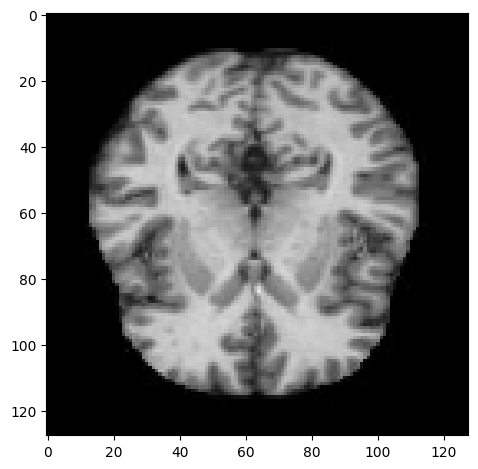

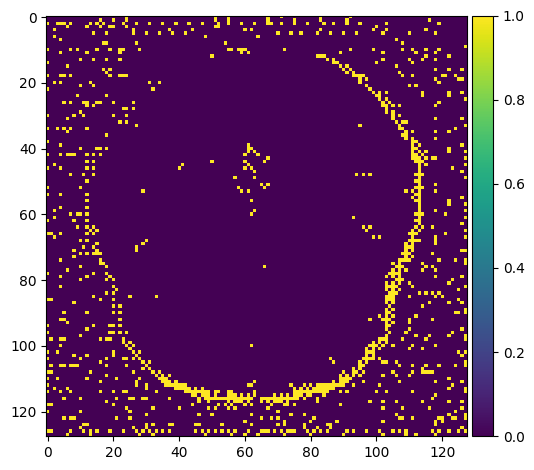

In [58]:
ix = random.randint(0, len(preds_train_t))
imshow(X_train[ix])
plt.show()

# imshow(np.squeeze(Y_train[ix]))
# plt.show()

imshow(np.squeeze(preds_train_t[ix]))
plt.show()


# ix = random.randint(0, len(preds_val_t))
# imshow(X_train[int(X_train.shape[0]*0.9):][ix])
# plt.show()
# imshow(np.squeeze(Y_train[int(Y_train.shape[0]*0.9):][ix]))
# plt.show()
# imshow(np.squeeze(preds_val_t[ix]))
# plt.show()



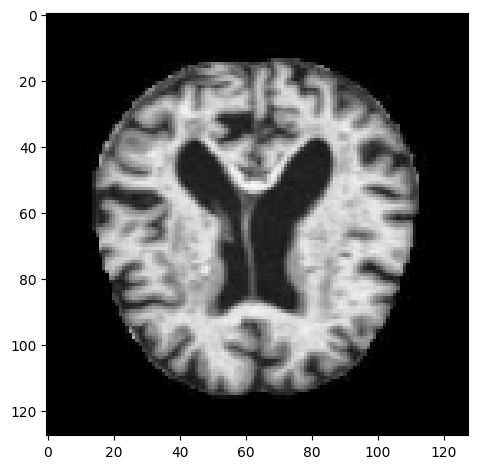

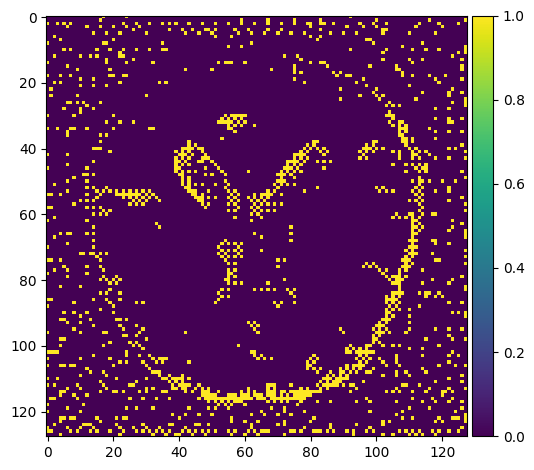

In [59]:

ix = random.randint(0, len(preds_val_t))
imshow(X_train[int(X_train.shape[0]*0.9):][ix])
plt.show()
# imshow(np.squeeze(Y_train[int(Y_train.shape[0]*0.9):][ix]))
# plt.show()
imshow(np.squeeze(preds_val_t[ix]))
plt.show()

TypeError: Invalid shape () for image data

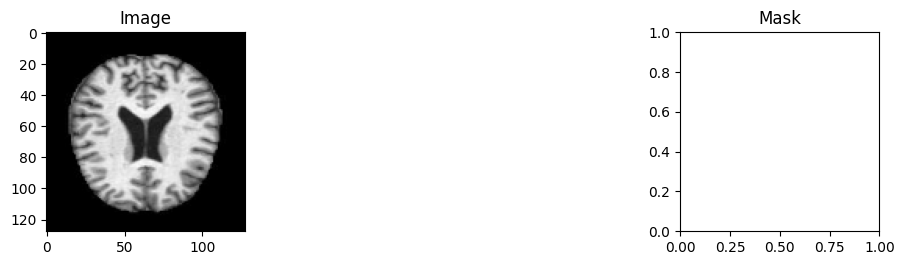

In [60]:
num_samples_to_check = 5
indices = random.sample(range(len(X_train)), num_samples_to_check)

plt.figure(figsize=(15, 15))

for i, ix in enumerate(indices):
    plt.subplot(num_samples_to_check, 2, 2*i + 1)
    plt.title("Image")
    plt.imshow(X_train[ix])
    
    plt.subplot(num_samples_to_check, 2, 2*i + 2)
    plt.title("Mask")
    plt.imshow(np.squeeze(Y_train[ix]), cmap='gray')

plt.show()